In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras

In [2]:
from keras.applications.resnet import preprocess_input
trainVGG = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
testVGG = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validationVGG = ImageDataGenerator(rescale = 1./255)

In [3]:
IMAGE_SIZE_VGG = (150, 150)
NUM_EPOCHS_VGG = 50
BATCH_SIZE_VGG = 32
LEARNING_RATE_VGG = 0.001
DROP_OUT_VGG = 0.3


train_dataset_VGG = trainVGG.flow_from_directory('dataset/Train/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset_VGG = trainVGG.flow_from_directory('dataset/Test/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset_VGG = trainVGG.flow_from_directory('dataset/Validation/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [4]:
validation_dataset_VGG.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [5]:
STEP_SIZE_TRAIN_VGG=len(train_dataset_VGG)
STEP_SIZE_VALID_VGG=len(validation_dataset_VGG)

In [6]:
conv_base_VGG = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base_VGG.trainable = False

model_VGG = models.Sequential()
model_VGG.add(conv_base_VGG)
model_VGG.add(layers.Flatten())
model_VGG.add(layers.Dense(128, activation='relu'))
model_VGG.add(Dropout(DROP_OUT_VGG))
model_VGG.add(layers.Dense(4, activation='softmax'))
model_VGG.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=LEARNING_RATE_VGG), metrics=['acc'])
model_VGG.save('RIoTVGG16.model')

INFO:tensorflow:Assets written to: RIoTVGG16.model\assets


In [7]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [8]:
print(model_VGG.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 15,763,908
Trainable params: 1,049,220
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [9]:
from keras.callbacks import CSVLogger
csv_VGG16 = CSVLogger('trainingVGG16.log', separator=',', append=False)

history_VGG=model_VGG.fit(train_dataset_VGG,
 steps_per_epoch =STEP_SIZE_TRAIN_VGG,
 validation_data = validation_dataset_VGG,
 validation_steps = STEP_SIZE_VALID_VGG,
 epochs= NUM_EPOCHS_VGG,
 callbacks=[early_stop]
 )

Epoch 1/50
100/100 [==============================] - 543s 5s/step - loss: 1.8717 - acc: 0.4672 - val_loss: 0.7910 - val_acc: 0.6950
Epoch 2/50
100/100 [==============================] - 542s 5s/step - loss: 0.7189 - acc: 0.7250 - val_loss: 0.7431 - val_acc: 0.6637
Epoch 3/50
100/100 [==============================] - 547s 5s/step - loss: 0.6118 - acc: 0.7653 - val_loss: 0.3673 - val_acc: 0.8569
Epoch 4/50
100/100 [==============================] - 543s 5s/step - loss: 0.5145 - acc: 0.8094 - val_loss: 0.3703 - val_acc: 0.8631
Epoch 5/50
100/100 [==============================] - 541s 5s/step - loss: 0.4605 - acc: 0.8250 - val_loss: 0.2706 - val_acc: 0.9019
Epoch 6/50
100/100 [==============================] - 545s 5s/step - loss: 0.3919 - acc: 0.8544 - val_loss: 0.3836 - val_acc: 0.8481
Epoch 7/50
100/100 [==============================] - 330s 3s/step - loss: 0.3703 - acc: 0.8603 - val_loss: 0.2149 - val_acc: 0.9250
Epoch 8/50
100/100 [==============================] - 277s 3s/step - 

In [10]:
model_VGG.evaluate(test_dataset_VGG)

25/25 [==============================] - 45s 2s/step - loss: 0.3033 - acc: 0.9513


[0.30331265926361084, 0.9512500166893005]

In [11]:
predictions_VGG = model_VGG.predict(x=test_dataset_VGG, verbose=0)

In [12]:
rounded_predictions_VGG = np.argmax(predictions_VGG, axis=-1)

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [14]:
cm_VGG = confusion_matrix(y_true=test_dataset_VGG.classes, y_pred=rounded_predictions_VGG)

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[180  20   0   0]
 [  3 195   0   2]
 [  2   4 194   0]
 [  6   3   0 191]]


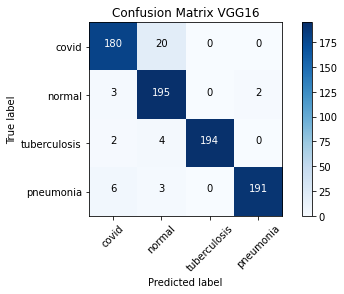

In [16]:
cm_plot_labels = ['covid', 'normal','tuberculosis', 'pneumonia']
plot_confusion_matrix(cm=cm_VGG, classes=cm_plot_labels, title='Confusion Matrix VGG16')

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [18]:
labels = ['covid', 'normal','tuberculosis', 'pneumonia']
report_VGG = classification_report(test_dataset_VGG.classes, rounded_predictions_VGG, target_names=labels)
print(report_VGG)


              precision    recall  f1-score   support

       covid       0.94      0.90      0.92       200
      normal       0.88      0.97      0.92       200
tuberculosis       1.00      0.97      0.98       200
   pneumonia       0.99      0.95      0.97       200

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [19]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()

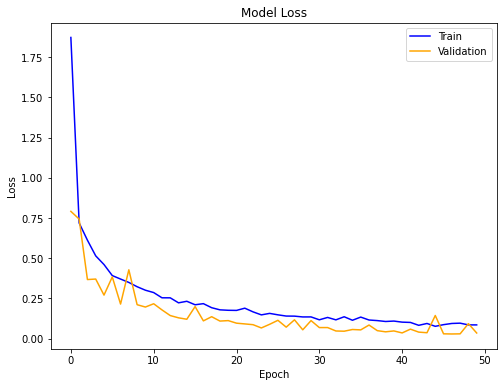

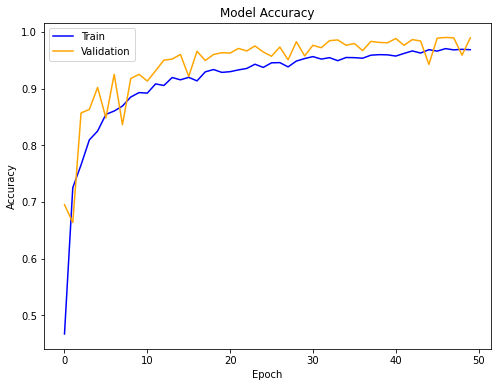

In [20]:
plot_loss_acc(history_VGG)